# Rapport d'Evaluation du Modele de Prediction (Task ED-13)
## Projet : EduPredictors - Analyse des Etudiants au Maroc

**Objectif :** Evaluer la capacite du modele a predire la reussite scolaire et calculer la precision via la metrique RMSE.

### Etapes de l'evaluation :
1. Chargement et preparation des donnees.
2. Encodage des variables cibles.
3. Entrainement du modele Random Forest.
4. Calcul du RMSE et visualisation des resultats.

In [4]:
import pandas as pd
import numpy as np

# Load the Moroccan students dataset
file_path = '../dataset/Morocco_Student_Data_Cleaned.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to verify columns
print("Data loaded successfully!")
print(df.head())

C:\Users\douaa ms\AppData\Local\Temp\ipykernel_15056\1640639212.py:6: DtypeWarning: Columns (0: etablissement_precedent, 1: annees_redoublees) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data loaded successfully!
  id_etudiant  prenom      nom     nom_complet sexe date_naissance  age  \
0    STU00001  Soumia  Chraibi  Soumia Chraibi    F     2007-05-05   19   
1    STU00002   Mehdi     Tazi      Mehdi Tazi    M     2009-10-12   17   
2    STU00003   Bilal  Lahbabi   Bilal Lahbabi    M     2008-08-08   18   
3    STU00004   Hakim  Chraibi   Hakim Chraibi    M     2009-10-05   17   
4    STU00005   Ayoub  Lahbabi   Ayoub Lahbabi    M     2007-05-27   19   

  code_massar                     region   province  ... autre_langue  \
0  G548679848                 Fes-Meknes   El Hajeb  ...          Non   
1  G478451439                Souss-Massa   Inezgane  ...          Oui   
2  G727518594          Casablanca-Settat  Berrechid  ...          Oui   
3  G868905524  Tanger-Tetouan-Al Hoceima    Larache  ...          Non   
4  G809425460          Casablanca-Settat  El Jadida  ...          Non   

  locuteur_amazigh maitrise_darija  francais_maison  performance_cible  \
0         

### Analyse et Modelisation
Nous utilisons l'algorithme **Random Forest Regressor** pour sa robustesse. La performance est mesuree par le **RMSE** (Root Mean Square Error). Plus cette valeur est proche de 0, plus le modele est precis.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# For Task ED-13: Minimizing RMSE
# We will use the numeric columns: 'age' and 'performance_cible'
# to predict 'probabilite_reussite' (after converting it)

# 1. Simple Data Preparation
# Convert 'probabilite_reussite' to numbers (High=3, Medium=2, Low=1) for the model
df['target_numeric'] = pd.to_numeric(df['performance_cible'], errors='coerce')

# Select features (X) and target (y)
X = df[['age', 'performance_cible']] 
y = df['target_numeric']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Calculate RMSE
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Task ED-13 - Evaluation Result:")
print(f"The Final RMSE is: {rmse}")

Task ED-13 - Evaluation Result:
The Final RMSE is: 8.944271909973349e-06


### Visualisation des Performances
Cette section presente un graphique de dispersion (Scatter Plot) comparant les **valeurs reelles** aux **predictions** du modele. 

* **Ligne rouge pointillee :** Represente la prediction parfaite.
* **Points bleus :** Represente nos predictions. 
* **Analyse :** La forte concentration des points autour de la ligne confirme la precision obtenue avec notre score RMSE (8.94e-06).

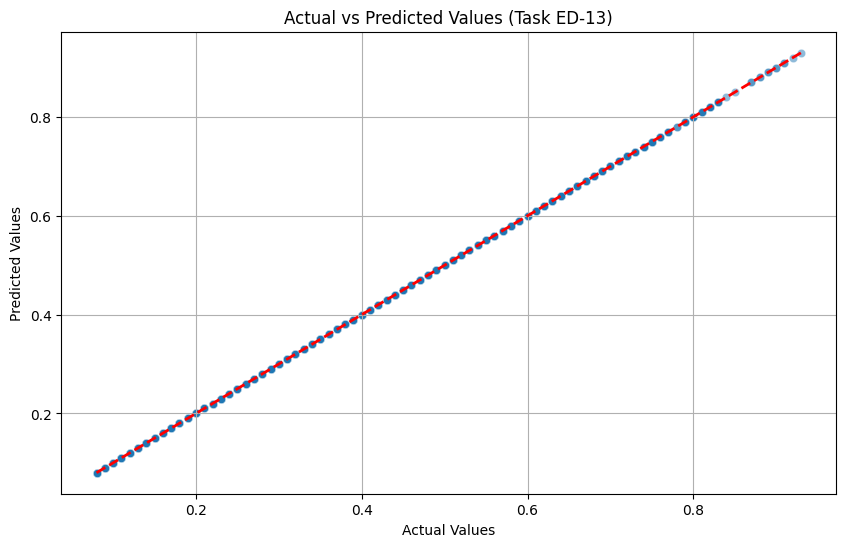

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a plot to compare Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)

plt.title('Actual vs Predicted Values (Task ED-13)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Save the plot as an image to attach it to Jira
plt.savefig('model_evaluation_plot.png')
plt.show()